# Exploratory Data Analysis


Cardiovascular disease (CVD) is the leading cause of serious illness and is the most 
common cause of mortality in developed and developing countries. In 1945, President
Franklin Delano Roosevelt died of haemorrhagic stroke due to uncontrolled 
hypertension, raising awareness about the rising toll of cardiovascular disease.
The Framingham Heart Study is a long-term, ongoing cardiovascular cohort study of 
residents of the city of Framingham, Massachusetts. The study began in 1948 under 
the direction of the National Heart Institute (now known as the National Heart, Lung, 
and Blood Institute or NHLBI) with 5,209 adult subjects from Framingham and is now 
on its third generation of participants. The study has not only contributed to our 
understanding of the natural history of cardiovascular disease and stroke, it also 
enabled us to identify their major risk factors. The overall impact of the Framingham 
Heart Study is vast, and the study continues to unveil new insights into human health 
until this day.


In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/heera/OneDrive - Heerak/Desktop/framingham.csv")
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


# Missing Values

In [3]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

([], [])

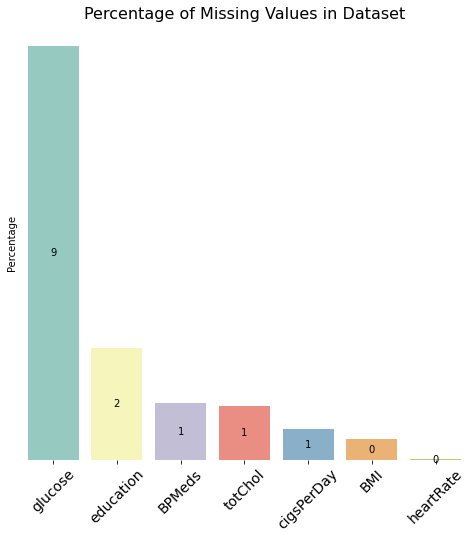

In [4]:
#missing data 
total = df.isnull().sum().sort_values(ascending=False)
count = df.isnull().count().sort_values(ascending=False)
per = (total/count)*100
missing = pd.concat([total, per], axis=1, keys=["Total", "Percentage"])
nullvals = missing[missing['Total']>0]
nullvals
fig, ax = plt.subplots(figsize=(8,8))
sns.barplot(x =nullvals.index, y=nullvals['Percentage'],data=nullvals,palette="Set3")
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f}'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
plt.title("Percentage of Missing Values in Dataset",fontsize= 16)
plt.xticks(fontsize=14,rotation=45)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

In [5]:
df["TenYearCHD"].value_counts()

0    3596
1     644
Name: TenYearCHD, dtype: int64

# Heatmap Correlation

<AxesSubplot:>

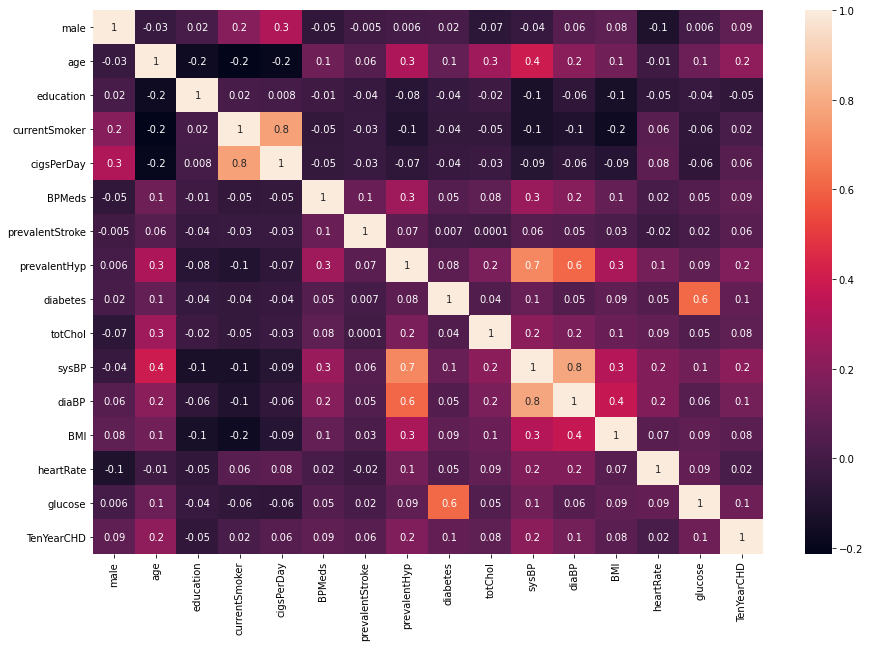

In [6]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), annot = True, fmt='.1g')

# Distribution of Age

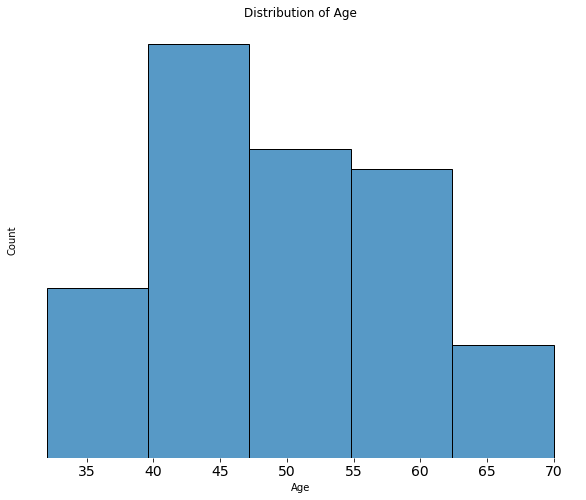

In [7]:
fig, ax = plt.subplots(figsize=(10,8))
sns.histplot(data=df, x="age",bins=5)
plt.xlabel('Age')
plt.title('Distribution of Age')
plt.xticks(fontsize=14,rotation=0)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])
plt.show()

([], [])

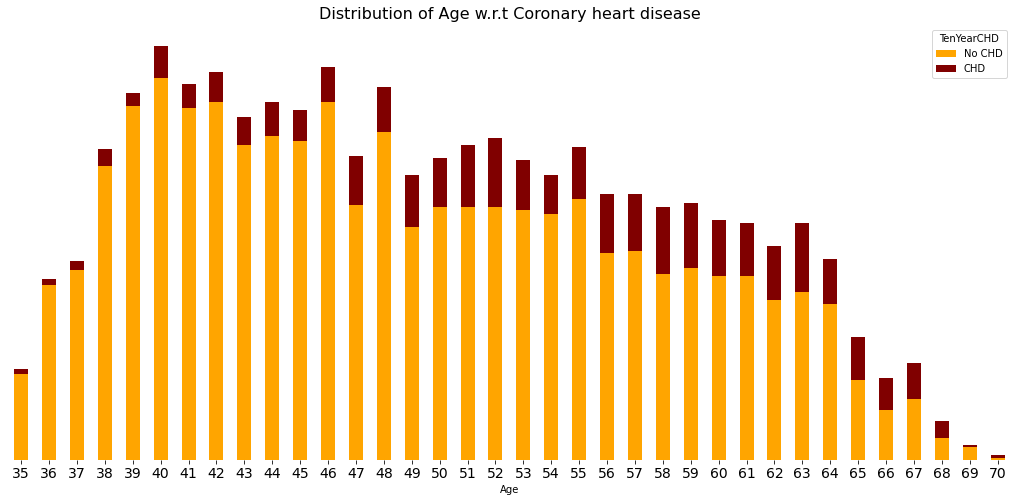

In [8]:
i=df[['TenYearCHD','age']].groupby(['age','TenYearCHD']).size().unstack('TenYearCHD').sort_values(by='age')
i.dropna(inplace=True)
i.rename(index={0:'j', 1:'j'}, columns={0:'No CHD', 1:'CHD'}, inplace = True)
colors_list = ['orange','maroon']
#fig = plt.subplots(figsize=(8,8))
ax = i.plot(kind='bar', stacked=True,color = colors_list,figsize=(18,8))

#Add this loop to add the annotations
#Referred this code for annotations :https://stackoverflow.com/questions/50160788/annotate-stacked-barplot-matplotlib-and-pandas
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
#     ax.text(x+width/2, 
#             y+height/2, 
#             '{:.0f}'.format(height), 
#             horizontalalignment='center', 
#             verticalalignment='center')
plt.xlabel('Age')
plt.title("Distribution of Age w.r.t Coronary heart disease",fontsize= 16)
plt.xticks(fontsize=14,rotation=0)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

# Count of TenYearCHD - Imbalanced dataset

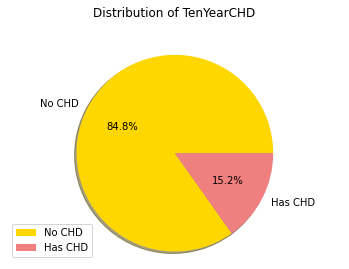

In [9]:
CHDcount = [3596,644]
colors_list = ['gold', 'lightcoral']
my_labels = 'No CHD','Has CHD'
plt.pie(CHDcount,labels=my_labels,autopct='%1.1f%%',shadow=True,colors=colors_list)
plt.title('Distribution of TenYearCHD', y=1.1) 
plt.legend(labels=my_labels, loc='lower left') 
plt.axis('equal')
plt.show()

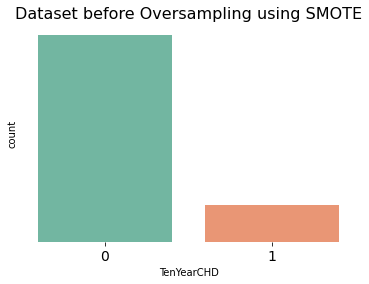

In [10]:
sns.countplot(x='TenYearCHD',data=df,palette="Set2")
# for p in ax.patches:
#     width, height = p.get_width(), p.get_height()
#     x, y = p.get_xy() 
#     ax.text(x+width/2, 
#             y+height/2, 
#             '{:.0f}'.format(height), 
#             horizontalalignment='center', 
#             verticalalignment='center')
plt.title("Dataset before Oversampling using SMOTE",fontsize= 16)
plt.xticks(fontsize=14,rotation=0)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])
plt.show()

# Distribution of Education

In [11]:
df["education"].value_counts()

1.0    1720
2.0    1253
3.0     689
4.0     473
Name: education, dtype: int64

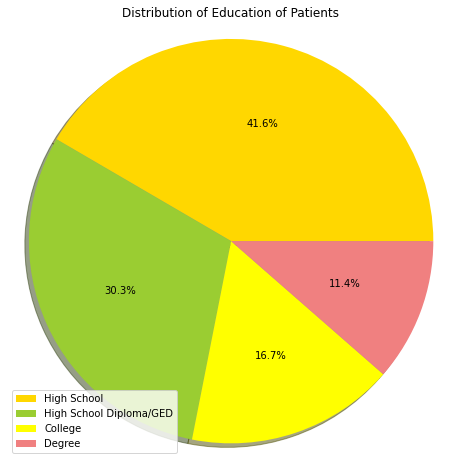

In [12]:
fig, ax = plt.subplots(figsize=(8,8))
education = [1720,1253,689,473]
colors_list = ['gold','yellowgreen','yellow', 'lightcoral']
my_labels = 'High School','High School Diploma/GED','College','Degree'
plt.pie(education,autopct='%1.1f%%',shadow=True,colors=colors_list)
plt.title('Distribution of Education of Patients', y=1.) 
plt.legend(labels=my_labels, loc='lower left') 
plt.axis('equal')
plt.show()

([], [])

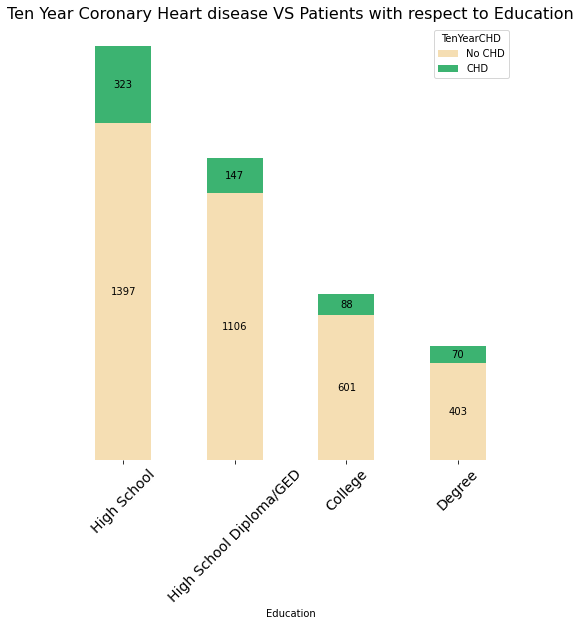

In [13]:
t=df[['education','TenYearCHD']].groupby(['education','TenYearCHD']).size().unstack('TenYearCHD')
t.rename(index={1:'High School', 2:'High School Diploma/GED',3:'College',4:'Degree'}, columns={0:'No CHD', 1:'CHD'}, inplace = True)
colors_list = ['wheat','mediumseagreen']
#fig = plt.subplots(figsize=(8,8))
ax = t.plot(kind='bar', stacked=True,color = colors_list,figsize=(8,8))

#Add this loop to add the annotations
#Referred this code for annotations :https://stackoverflow.com/questions/50160788/annotate-stacked-barplot-matplotlib-and-pandas
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f}'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
plt.xlabel('Education')
plt.title("Ten Year Coronary Heart disease VS Patients with respect to Education",fontsize= 16)
plt.xticks(fontsize=14,rotation=45)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

# Gender vs CHD

([], [])

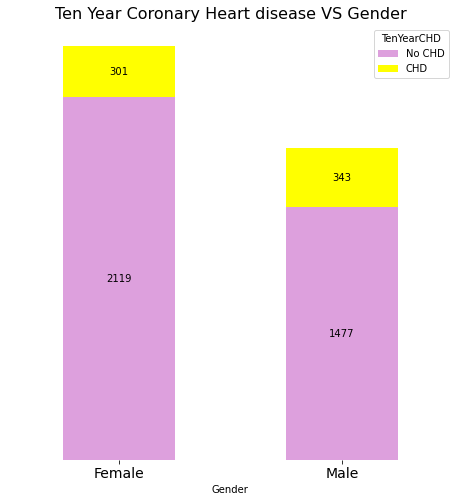

In [14]:

x=df[['male','TenYearCHD']].groupby(['male','TenYearCHD']).size().unstack('TenYearCHD')
x.rename(index={0:'Female', 1:'Male'}, columns={0:'No CHD', 1:'CHD'}, inplace = True)
colors_list = ['plum','yellow']
#fig = plt.subplots(figsize=(8,8))
ax = x.plot(kind='bar', stacked=True,color = colors_list,figsize=(8,8))

#Add this loop to add the annotations
#Referred this code for annotations :https://stackoverflow.com/questions/50160788/annotate-stacked-barplot-matplotlib-and-pandas
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f}'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
plt.xlabel('Gender')
plt.title("Ten Year Coronary Heart disease VS Gender",fontsize= 16)
plt.xticks(fontsize=14,rotation=0)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

([], [])

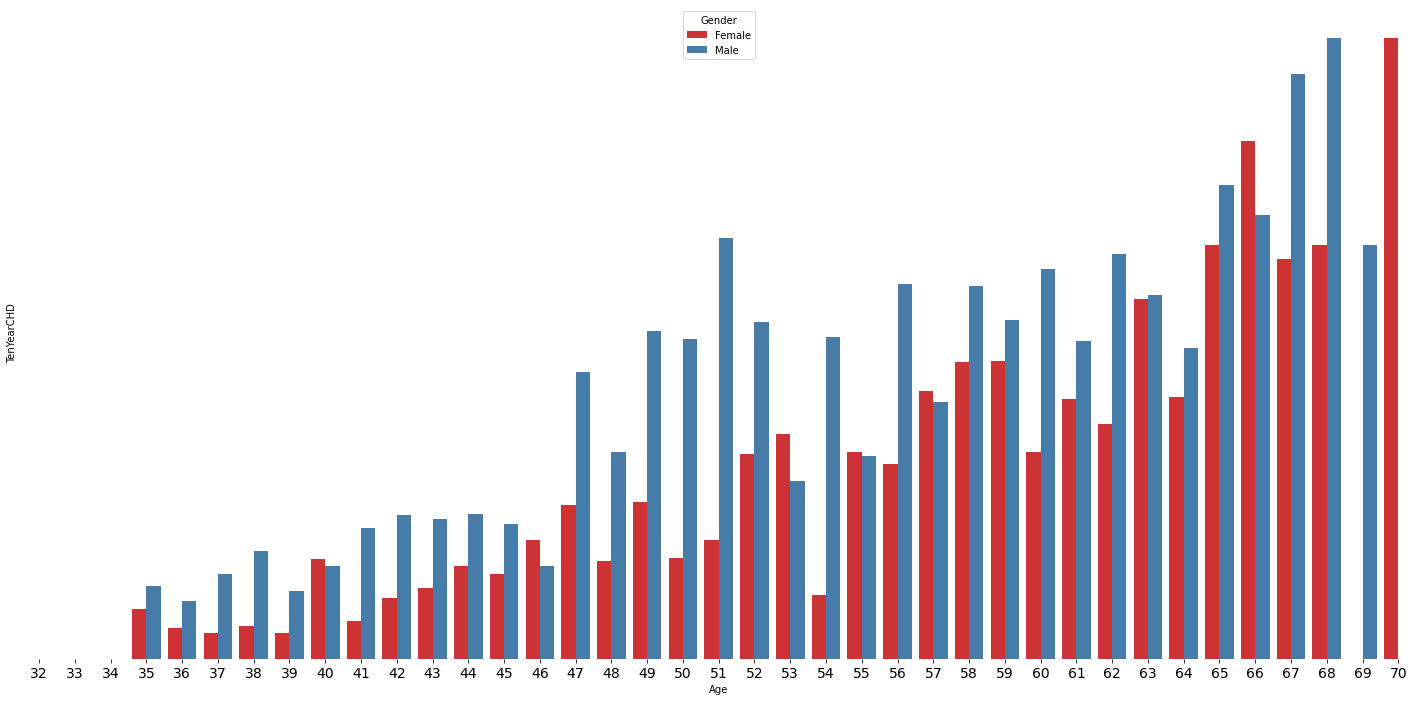

In [15]:
h=df[['TenYearCHD','age','male']].sort_values(by='age')
h.dropna(inplace=True)
h.rename(columns={'age':'Age', 'male':'Gender'}, inplace = True)
h["Gender"]=h["Gender"].replace(to_replace =0,value ="Female")
h["Gender"]=h["Gender"].replace(to_replace =1,value ="Male")
plt.figure(figsize=(25,12))
sns.barplot(x='Age',y='TenYearCHD',data = h, hue = 'Gender',palette="Set1",ci= None)
ax.legend(labels=['Men', 'Women'])
plt.xticks(fontsize=14,rotation=0)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

# Pairplot of all features

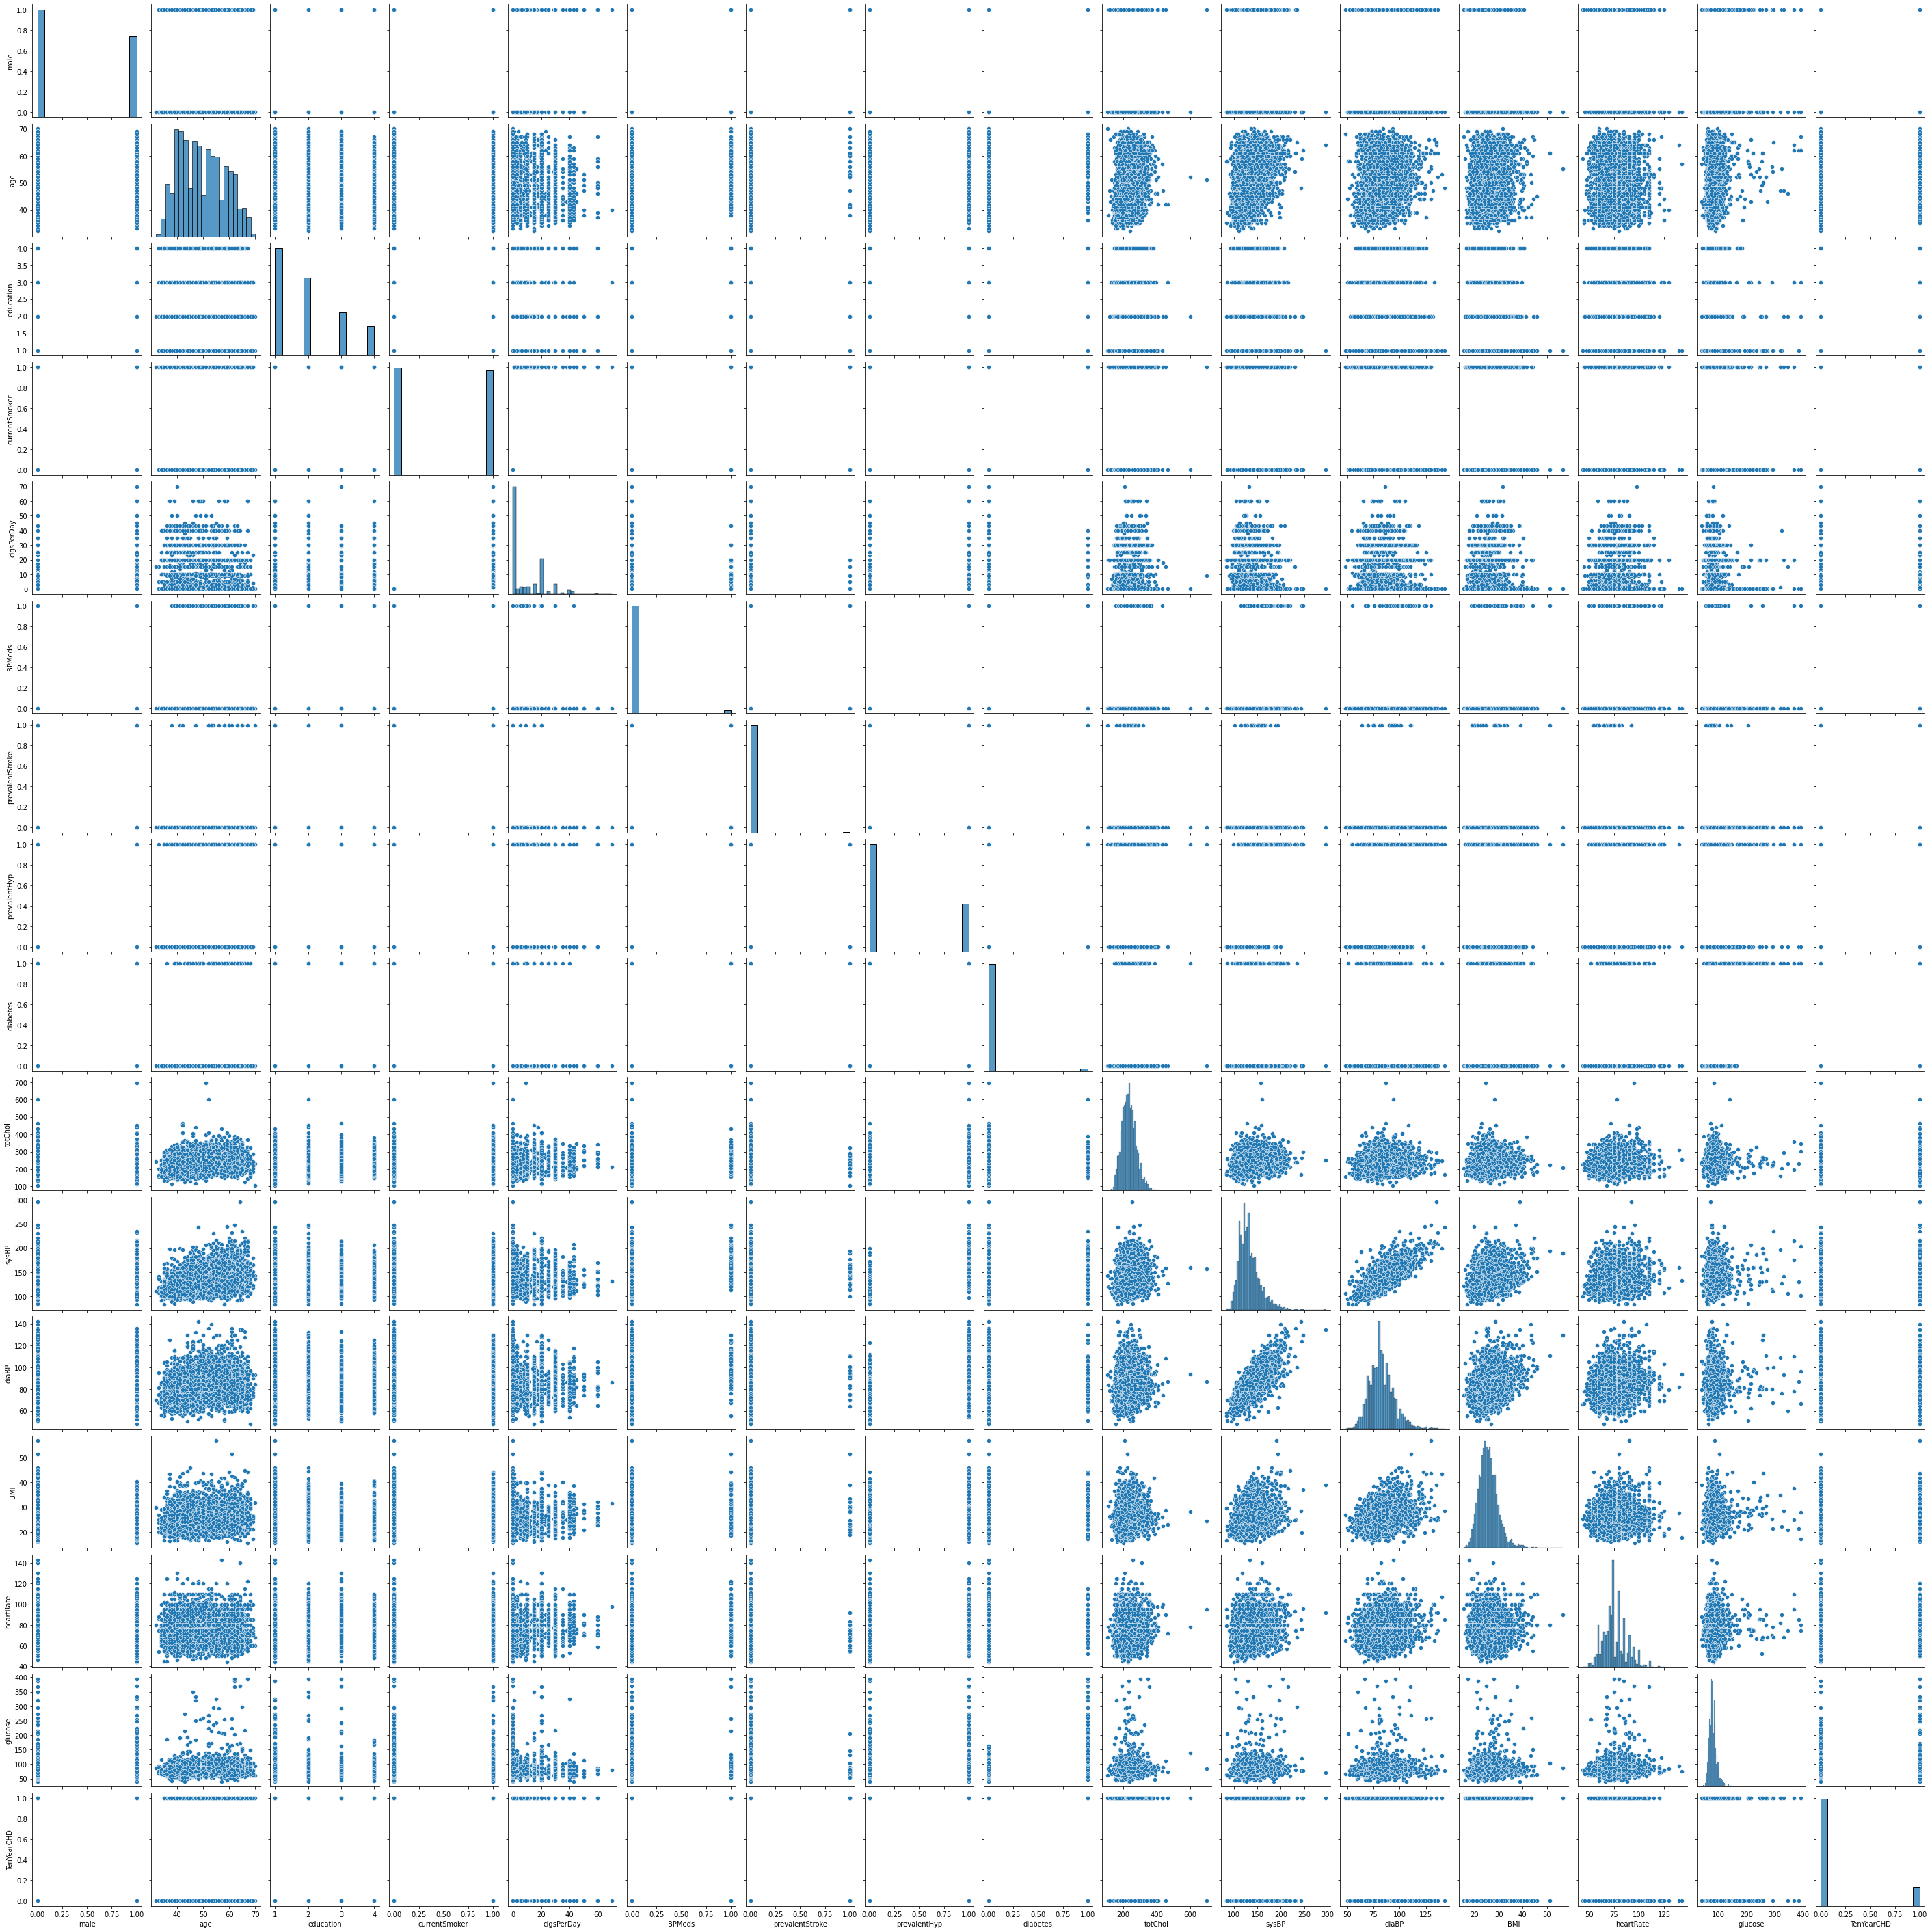

In [16]:
ab = sns.pairplot(df)


# Smoking a risk factor

([], [])

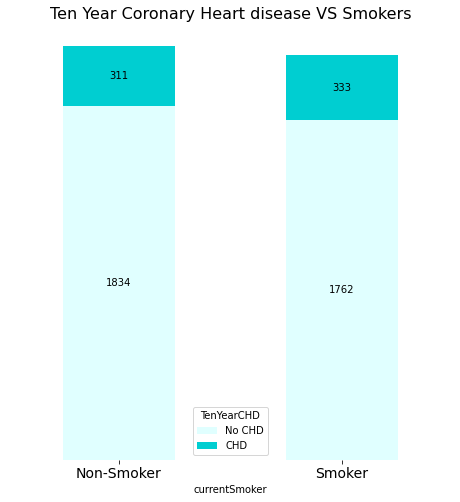

In [17]:
y =df[['currentSmoker','TenYearCHD']].groupby(['currentSmoker','TenYearCHD']).size().unstack('TenYearCHD')
y.rename(index={0:'Non-Smoker', 1:'Smoker'}, columns={0:'No CHD', 1:'CHD'}, inplace = True)
colors_list = ['lightcyan','darkturquoise']
#fig = plt.subplots(figsize=(8,8))
ax = y.plot(kind='bar', stacked=True,color = colors_list,figsize=(8,8))

#Add this loop to add the annotations
#Referred this code for annotations :https://stackoverflow.com/questions/50160788/annotate-stacked-barplot-matplotlib-and-pandas
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f}'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
plt.title("Ten Year Coronary Heart disease VS Smokers",fontsize= 16)
plt.xticks(fontsize=14,rotation=0)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

([], [])

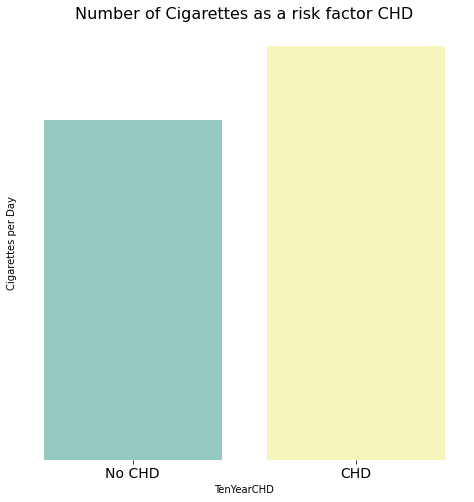

In [18]:
smoke=df[['TenYearCHD','cigsPerDay']].sort_values(by='cigsPerDay')
smoke.dropna(inplace=True)
smoke.rename(columns={'cigsPerDay':'Cigarettes per Day'}, inplace = True)
smoke['TenYearCHD']=smoke['TenYearCHD'].replace(to_replace =0,value ="No CHD")
smoke['TenYearCHD']=smoke['TenYearCHD'].replace(to_replace =1,value ="CHD")
plt.figure(figsize=(8,8))
sns.barplot(x = smoke['TenYearCHD'], y = smoke['Cigarettes per Day'],palette = 'Set3',ci=None)
plt.title("Number of Cigarettes as a risk factor CHD",fontsize= 16)
plt.xticks(fontsize=14,rotation=0)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

([], [])

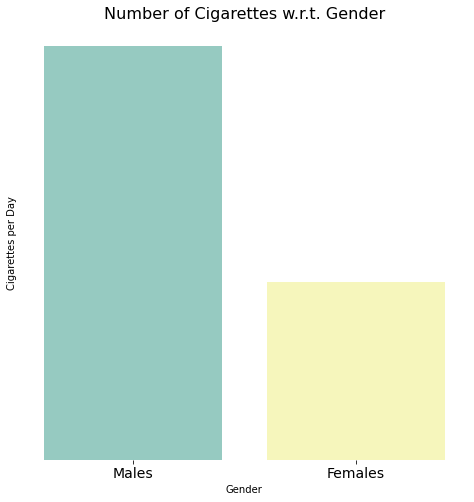

In [19]:
smoke=df[['male','cigsPerDay']].sort_values(by='cigsPerDay')
smoke.dropna(inplace=True)
smoke.rename(columns={'male':'Gender','cigsPerDay':'Cigarettes per Day'}, inplace = True)
smoke['Gender']=smoke['Gender'].replace(to_replace =0,value ="Females")
smoke['Gender']=smoke['Gender'].replace(to_replace =1,value ="Males")
plt.figure(figsize=(8,8))
sns.barplot(x = smoke['Gender'], y = smoke['Cigarettes per Day'],palette = 'Set3',ci=None)
plt.title("Number of Cigarettes w.r.t. Gender",fontsize= 16)
plt.xticks(fontsize=14,rotation=0)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

<AxesSubplot:xlabel='male', ylabel='cigsPerDay'>

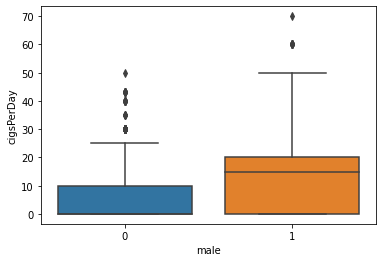

In [20]:
sns.boxplot(x = df['male'], y = df['cigsPerDay'])

# Diabetes a risk factor for CHD

TenYearCHD,No CHD,CHD
diabetes,,
No Diabetes,3527,604
Have Diabetes,69,40


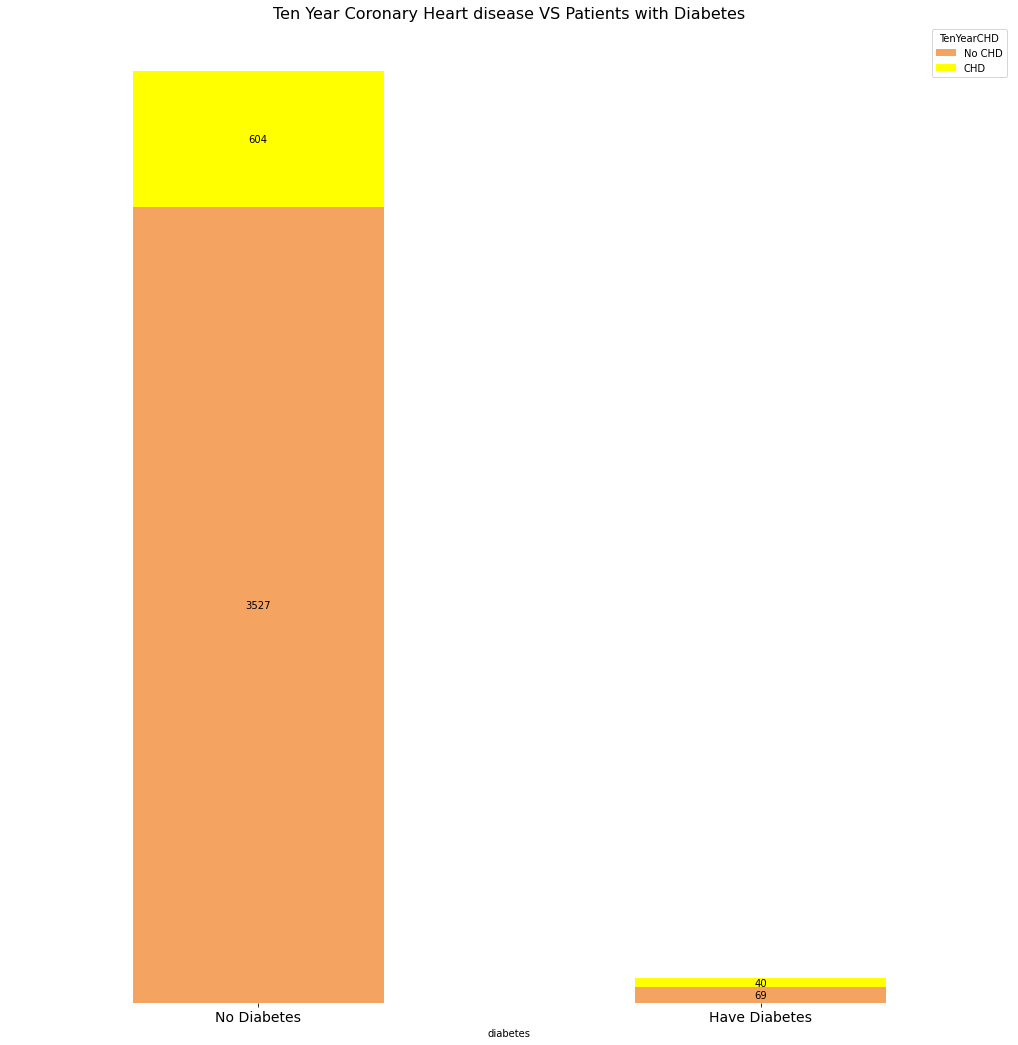

In [21]:
w=df[['diabetes','TenYearCHD']].groupby(['diabetes','TenYearCHD']).size().unstack('TenYearCHD')
w.rename(index={0:'No Diabetes', 1:'Have Diabetes'}, columns={0:'No CHD', 1:'CHD'}, inplace = True)
colors_list = ['sandybrown','yellow']
#fig = plt.subplots(figsize=(8,8))
ax = w.plot(kind='bar', stacked=True,color = colors_list,figsize=(18,18))

#Add this loop to add the annotations
#Referred this code for annotations :https://stackoverflow.com/questions/50160788/annotate-stacked-barplot-matplotlib-and-pandas
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f}'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
plt.title("Ten Year Coronary Heart disease VS Patients with Diabetes",fontsize= 16)
plt.xticks(fontsize=14,rotation=0)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])
w

([], [])

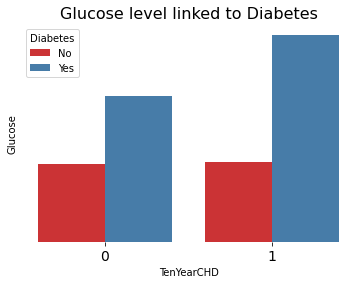

In [22]:
glu=df[['TenYearCHD','diabetes','glucose']].sort_values(by="glucose")
glu.dropna(inplace=True)
glu.rename(columns={'diabetes':'Diabetes','glucose':'Glucose'}, inplace = True)
glu['Diabetes']=glu['Diabetes'].replace(to_replace =0,value ="No")
glu['Diabetes']=glu['Diabetes'].replace(to_replace =1,value ="Yes")
sns.barplot(x = glu['TenYearCHD'], y = glu['Glucose'],hue=glu['Diabetes'],palette="Set1",ci=None)
plt.title("Glucose level linked to Diabetes",fontsize= 16)
plt.xticks(fontsize=14,rotation=0)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

<AxesSubplot:xlabel='TenYearCHD', ylabel='age'>

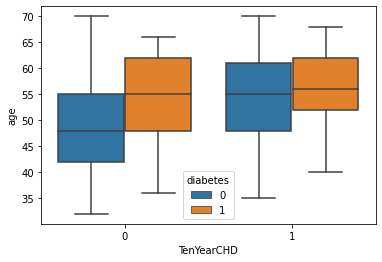

In [23]:
sns.boxplot(x = df['TenYearCHD'], y = df['age'],hue=df['diabetes'])

<AxesSubplot:xlabel='diabetes', ylabel='age'>

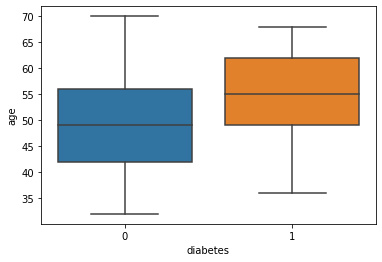

In [24]:
sns.boxplot(x = df['diabetes'], y = df['age'])

# Hypertension and CHD

([], [])

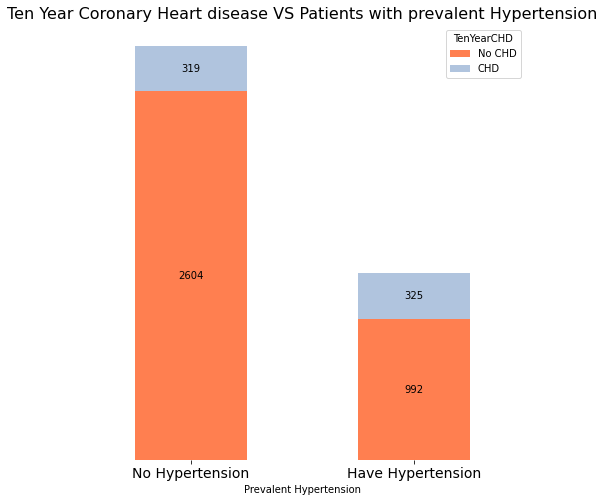

In [25]:
u=df[['prevalentHyp','TenYearCHD']].groupby(['prevalentHyp','TenYearCHD']).size().unstack('TenYearCHD')
u.rename(index={0:'No Hypertension', 1:'Have Hypertension'}, columns={0:'No CHD', 1:'CHD'}, inplace = True)
colors_list = ['coral','lightsteelblue']
#fig = plt.subplots(figsize=(8,8))
ax = u.plot(kind='bar', stacked=True,color = colors_list,figsize=(8,8))

#Add this loop to add the annotations
#Referred this code for annotations :https://stackoverflow.com/questions/50160788/annotate-stacked-barplot-matplotlib-and-pandas
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f}'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
plt.title("Ten Year Coronary Heart disease VS Patients with prevalent Hypertension",fontsize= 16)
plt.xlabel('Prevalent Hypertension')
plt.xticks(fontsize=14,rotation=0)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

<AxesSubplot:xlabel='TenYearCHD', ylabel='sysBP'>

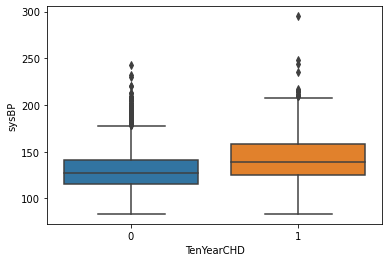

In [26]:
sns.boxplot(x = df['TenYearCHD'], y = df['sysBP'])

<AxesSubplot:xlabel='TenYearCHD', ylabel='diaBP'>

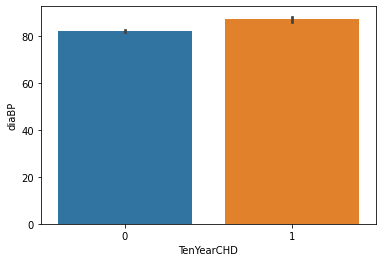

In [27]:
sns.barplot(x = df['TenYearCHD'], y = df['diaBP'])

# BP Medication and CHD

([], [])

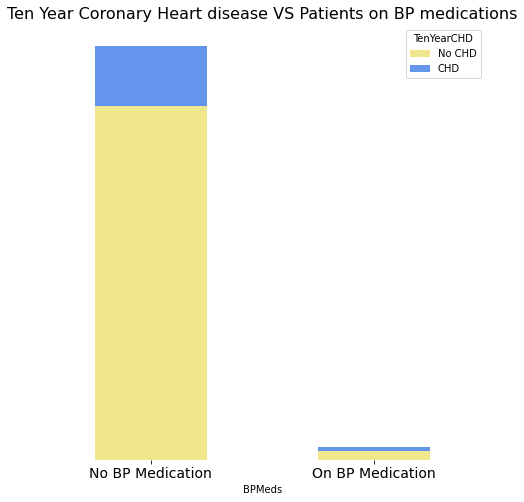

In [28]:
z=df[['BPMeds','TenYearCHD']].groupby(['BPMeds','TenYearCHD']).size().unstack('TenYearCHD')
z.rename(index={0:'No BP Medication', 1:'On BP Medication'}, columns={0:'No CHD', 1:'CHD'}, inplace = True)
colors_list = ['khaki','cornflowerblue']
#fig = plt.subplots(figsize=(8,8))
ax = z.plot(kind='bar', stacked=True,color = colors_list,figsize=(8,8))

#Add this loop to add the annotations
#Referred this code for annotations :https://stackoverflow.com/questions/50160788/annotate-stacked-barplot-matplotlib-and-pandas
# for p in ax.patches:
#     width, height = p.get_width(), p.get_height()
#     x, y = p.get_xy() 
#     ax.text(x+width/2, 
#             y+height/2, 
#             '{:.0f}'.format(height), 
#             horizontalalignment='center', 
#             verticalalignment='center')
plt.title("Ten Year Coronary Heart disease VS Patients on BP medications",fontsize= 16)
plt.xticks(fontsize=14,rotation=0)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

In [33]:
pip install ploty

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement ploty (from versions: none)
ERROR: No matching distribution found for ploty


In [31]:
import plotly. as px
j=df[['TenYearCHD','sysBP']].sort_values(by='sysBP')
j.dropna(inplace=True)
j.rename(columns={'TenYearCHD':'TenYearCHD', 'sysBP':'Systolic Blood pressure'}, inplace = True)
fig = px.histogram(j, x="Systolic Blood pressure", color="TenYearCHD")
fig.show()

ModuleNotFoundError: No module named 'plotly'

# Stroke as a risk factor for CHD

In [ ]:
sns.boxplot(x = df['TenYearCHD'], y = df['age'],hue=df['prevalentStroke'])

# BMI and Cholesterol a risk factor

In [ ]:
sns.boxplot(x = df['TenYearCHD'], y = df['totChol'])

In [ ]:
sns.barplot(x = df['TenYearCHD'], y = df['BMI'])

In [ ]:
sns.scatterplot(x = df['totChol'], y = df['BMI'])

In [ ]:
sns.scatterplot(x = df['totChol'], y = df['heartRate'])

In [ ]:
sns.barplot(x = df['TenYearCHD'], y = df['BMI'])

In [ ]:
k=df[['TenYearCHD','BMI']].sort_values(by='BMI')
k.dropna(inplace=True)
k.rename(columns={'TenYearCHD':'TenYearCHD', 'BMI':'Body Mass Index'}, inplace = True)
fig = px.histogram(k, x="Body Mass Index", color="TenYearCHD")
fig.show()


# Age affects Hypertension


In [ ]:
hyp=df[['TenYearCHD','prevalentHyp','age']].sort_values(by="age")
hyp.dropna(inplace=True)
hyp.rename(columns={'prevalentHyp':'Prevalent Hypertension','age':'Age'}, inplace = True)
fig = px.box(hyp, x="TenYearCHD", y="Age", color = 'Prevalent Hypertension')
# x = df['TenYearCHD'], y = df['age'],hue=df['diabetes']
fig.show()

# Age contributing factor Stroke

In [ ]:
strok=df[['TenYearCHD','prevalentStroke','age']].sort_values(by="age")
strok.dropna(inplace=True)
strok.rename(columns={'prevalentStroke':'Prevalent Stroke','age':'Age'}, inplace = True)
fig = px.box(strok, x="TenYearCHD", y="Age", color = 'Prevalent Stroke')

fig.show()


#Scatter plot BMI vs Cholesterol 

In [ ]:
chol=df[['BMI','TenYearCHD','totChol']].sort_values(by="totChol")
chol.dropna(inplace=True)
chol.rename(columns={'totChol':'Cholesterol'}, inplace = True)
fig = px.scatter(chol, x="Cholesterol", y="BMI")
fig.show()

In [ ]:
bmi=df[['BMI','TenYearCHD','totChol']].sort_values(by="totChol")
bmi.dropna(inplace=True)
bmi.rename(columns={'totChol':'Cholesterol'}, inplace = True)
fig = px.box(bmi, x="TenYearCHD", y="BMI")
fig.show()

Summary

1. Age of a person is a high contributing factor in Coronary heart disease.
2. Men have a higher risk of developing Coronary Heart Disease when compared 
to Women.
3. Heart disease risk is found to increase in women after Menopause.
4. Cigarette smoking is linked to CHD.
5. Males consume a greater number of Cigarettes in Comparison to Females and 
have higher risk for developing Coronary Heart Disease.
6. High Blood pressure is a risk for Stroke and Heart Disease.
7. Diabetes is linked to Coronary Heart Disease.
8. Risk of Hypertension, Stroke and Diabetes increases with Age.
9. Obesity and high Cholesterol levels increase risk of Coronary Heart Disease.


References
[1] https://www.nih.gov/sites/default/files/about-nih/impact/framingham-heartstudy.pdf
[2]https://en.wikipedia.org/wiki/Framingham_Heart_Study#:~:text=The%20Framingh
am%20Heart%20Study%20is,its%20third%20generation%20of%20participants.
[3] https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4159698/
[4] https://framinghamheartstudy.org/fhs-for-researchers/data-available-overview